In [122]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
import h5py
import random
import pickle as pkl
import os
import torch
sys.path.append('/extra/yadongl10/BIG_sandbox/SparseImageFlows')
import data_loader
import imp
imp.reload(data_loader)
from torch.distributions import Normal, Bernoulli
import h5py
import numpy as np
import utils
from data_loader import load_LAGAN, load_data_LAGAN
from plot_utils import discrete_mass, discrete_pt
import seaborn as sns

# 1. Transform and create one-hot image dataset

In [12]:
# quantize dataset to [0,1,...,300]
image = load_data_LAGAN(subset='background')  # signal
bins = np.linspace(0,284,285)
inds = np.digitize(image, bins)
quantized_image = np.digitize(image, bins, right=False) - 1

In [14]:
# img_dir = "/baldig/physicsprojects/lagan"
# with h5py.File(img_dir + '/discretized_lagan.h5', 'w') as f:
#     f.create_dataset('signal', data=quantized_image)
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir + '/discretized_lagan.h5', 'a') as f:
    f.create_dataset('background', data=quantized_image)

In [11]:
image.max(), image.min(), image.mean()

(284.67654, 0.0, 0.44451484)

In [13]:
quantized_image.max(), quantized_image.min(), quantized_image.mean()

(284, 0, 0.41092748520052347)

In [15]:
# check saved data
with h5py.File(img_dir + '/discretized_lagan.h5', 'r') as f:
    for i in f:
        print(i)

background
signal


# 2. Load trained model

In [195]:
sampledir = '/extra/yadongl10/BIG_sandbox/SparseImageFlows_result/lagan_pixelcnn/a1_b3/2019-12-05_14-34-25'
with open(sampledir+'/samples_epoch-11.pkl', 'rb') as f:
    x = pkl.load(f).squeeze()
x = np.asarray(x)

0.00085625


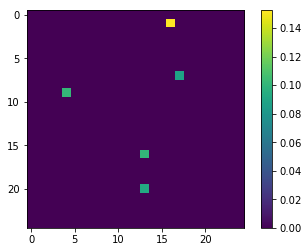

In [196]:
plt.imshow(x.mean(axis=0))
plt.colorbar()
print(x.mean())

In [164]:
# 
# torch.nn.CrossEntropyLoss()(x[0]*276, image[0])

In [134]:
img_dir = "/baldig/physicsprojects/lagan"
with h5py.File(img_dir + '/discretized_lagan.h5', 'r') as f:
    image = np.asarray(f['signal'])

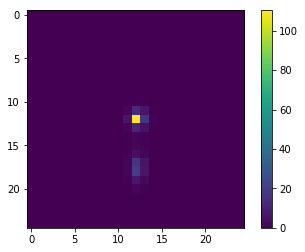

In [135]:
plt.imshow(image.mean(axis=0))
plt.colorbar()

In [136]:
image[0]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

# 3. Transform generated one-hot image to real value

# 4. Compare statistics (mass, pt)

In [165]:
getattr(torch.optim, "Adam")

torch.optim.adam.Adam